
# Homework #4

Winter 2025 - UCLA, Student: Budhaditya De, UCLA ID: 206182210

### Introduction

In this homework, a python script is developed using functions for carrying out classification of data through different ML algorithms including Losgistic regression, Support Vector Machines, Decision Trees, Random Forests and Gradient Boosting. The Oil analysis data from previous homework was used and class predictions are performed for shafts and gears first with respect to the 'Alarms' label and then the 'Diagnostics' label. For each ML algorithm, different model parameters values were tried and results are shown only for the case which gave the maximum test case accuracy. 

In [1]:
%load_ext autoreload
%autoreload 2
%reset -f

## Task 1

The Oil analysis dataset is first classified based on the 'Alarms' label. For each ML model, the raw dataset is first cleaned and preprocessed per the requirmenets using the hw2.py preprocess_oil() function and then splitted into 80/20 % for training and test cases. Standard scaling is also performed for all models.

In [28]:
import hw2
import hw4
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Reading the raw dataset 
df = pd.read_csv('Oil_Analysis_Raw_Data_2025_Timestamped.csv', header = 'infer')
features, labels = hw2.preprocess_oil(df) # Calling preprocess function which returns features and labels as separate dataframes

hw4.percent_alarms(df)

Normal state proportion: 50.34%
warning state proportion: 37.04%
caution state proportion: 12.61%


As we can see the labels in the 'Alarms' column are unbalanced, therefore the 'balanced' attribute is omitted in all the ML model function parameter declarations. Also for the decision boundary visualization, two features namely 'Iron' and 'Chrome' are used for plotting based on feature importance scores from Random Forest model as shown later.

1.) Logistic Regression (penalty = 'l2', C = 1000, random_state = 42, max_iter = 1000)

Accuracy on train dataset: 81.67%
              precision    recall  f1-score   support

      Normal    0.85814   0.90000   0.87857       410
     Warning    0.66960   0.67857   0.67406       224
     Caution    0.87000   0.70732   0.78027       123

    accuracy                        0.80317       757
   macro avg    0.79925   0.76196   0.77763       757
weighted avg    0.80428   0.80317   0.80208       757

Balanced Accurancy: 0.76196
Unbalanced Accurancy: 0.80317


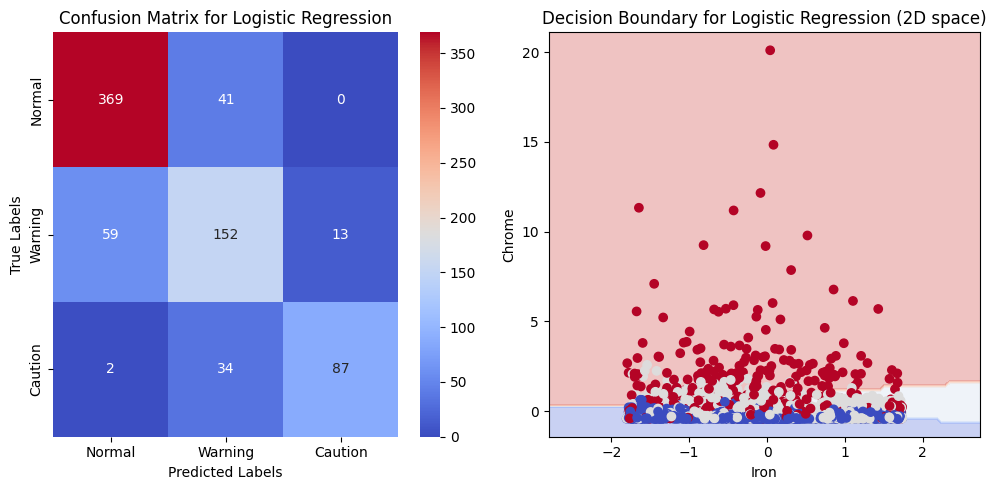

In [ ]:
import hw4
labels_names = ['Normal', 'Warning', 'Caution'] # label names for 'Alarms' column
hw4.Logistic(features,labels,labels_names,1) # Calling the logistic regression function 

Fig. 1: (a) Confusion matrix for Logistic regression. (b) Decision boundary visualization with 2 features (blue - normal, white - warning, red -  caution)

2.) Support Vector Machines (kernel = 'rbf', C = 100, gamma = 'scale')

Accuracy on train dataset: 93.66%
              precision    recall  f1-score   support

      Normal    0.89786   0.92195   0.90975       410
     Warning    0.71193   0.77232   0.74090       224
     Caution    0.89247   0.67480   0.76852       123

    accuracy                        0.83752       757
   macro avg    0.83409   0.78969   0.80639       757
weighted avg    0.84197   0.83752   0.83684       757

Balanced Accurancy: 0.78969
Unbalanced Accurancy: 0.83752


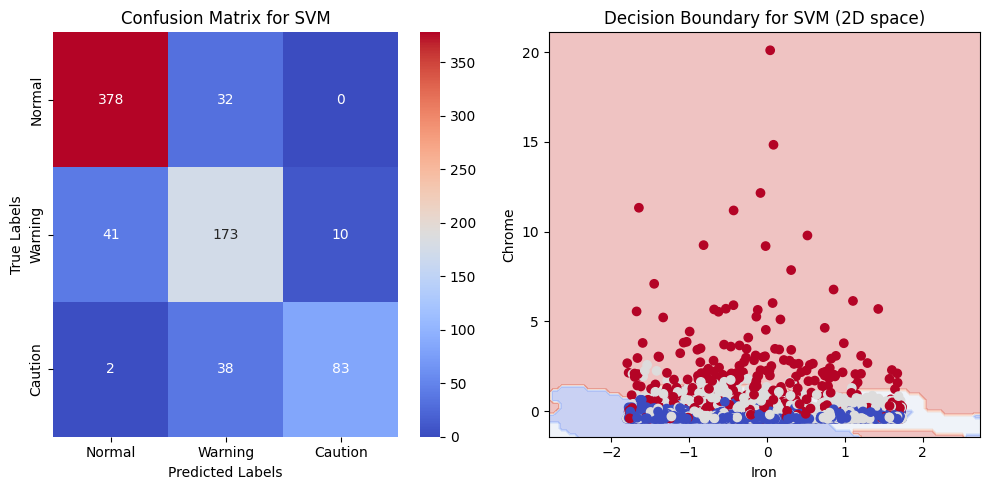

In [10]:
hw4.SVM(features,labels,labels_names,1)

Fig. 2: (a) Confusion matrix for SVM. (b) Decision boundary visualization with 2 features (blue - normal, white - warning, red -  caution)

3.) Decision Trees (criterion = 'gini', max_depth = 20, min_samples_split = 20, min_samples_leaf = 5, min_impurity_decrease = 0, random_state = 42)

Accuracy on train dataset: 91.18%
              precision    recall  f1-score   support

      Normal    0.90376   0.93902   0.92105       410
     Warning    0.78924   0.78571   0.78747       224
     Caution    0.85185   0.74797   0.79654       123

    accuracy                        0.86262       757
   macro avg    0.84828   0.82424   0.83502       757
weighted avg    0.86144   0.86262   0.86129       757

Balanced Accurancy: 0.82424
Unbalanced Accurancy: 0.86262


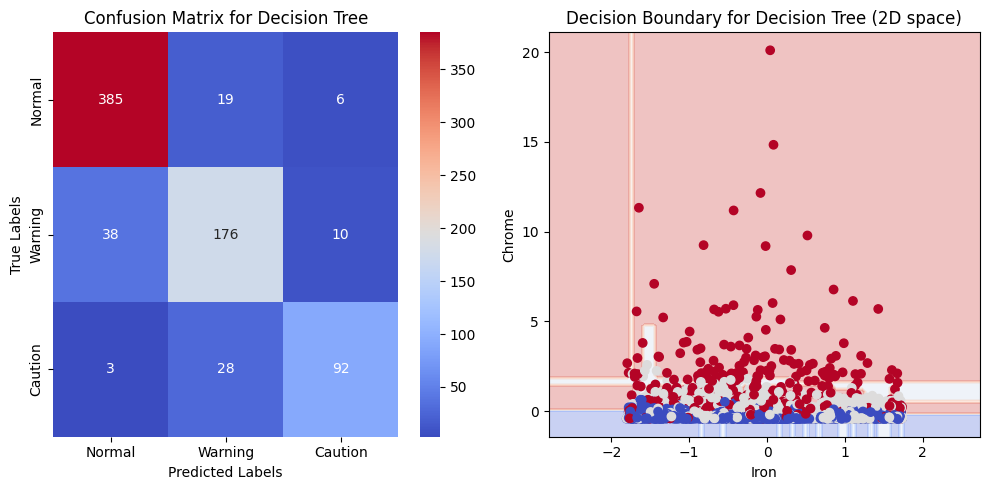

In [11]:
hw4.DecisionTree(features,labels,labels_names,1)

Fig. 3: (a) Confusion matrix for Decision Tree. (b) Decision boundary visualization with 2 features (blue - normal, white - warning, red -  caution)

4.) Random Forest (criterion = 'gini', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_impurity_decrease = 0, random_state = 42, 
n_estimators = 100, bootstrap = True, oob_score = False)

Accuracy on train dataset: 100.00%
              precision    recall  f1-score   support

      Normal    0.90698   0.95122   0.92857       410
     Warning    0.81250   0.81250   0.81250       224
     Caution    0.94175   0.78862   0.85841       123

    accuracy                        0.88375       757
   macro avg    0.88707   0.85078   0.86649       757
weighted avg    0.88467   0.88375   0.88282       757

Balanced Accurancy: 0.85078
Unbalanced Accurancy: 0.88375


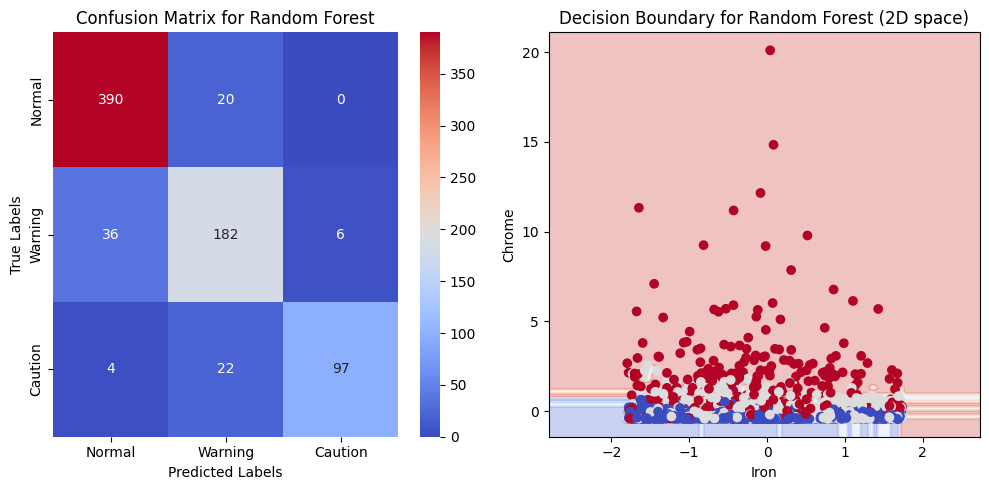

In [12]:
hw4.RandomForest(features,labels,labels_names,1)

Fig. 4: (a) Confusion matrix for Random Forest. (b) Decision boundary visualization with 2 features (blue - normal, white - warning, red - caution)

In [ ]:
# Feature importance scores
hw4.Feature_score(features,labels)

5.) Gradient Boosting (max_depth = 20, n_estimators = 50, learning_rate = 0.5, random_state = 42)

Accuracy on train dataset: 100.00%
              precision    recall  f1-score   support

      Normal    0.90758   0.93415   0.92067       410
     Warning    0.81019   0.78125   0.79545       224
     Caution    0.86555   0.83740   0.85124       123

    accuracy                        0.87318       757
   macro avg    0.86110   0.85093   0.85579       757
weighted avg    0.87193   0.87318   0.87234       757

Balanced Accurancy: 0.85093
Unbalanced Accurancy: 0.87318


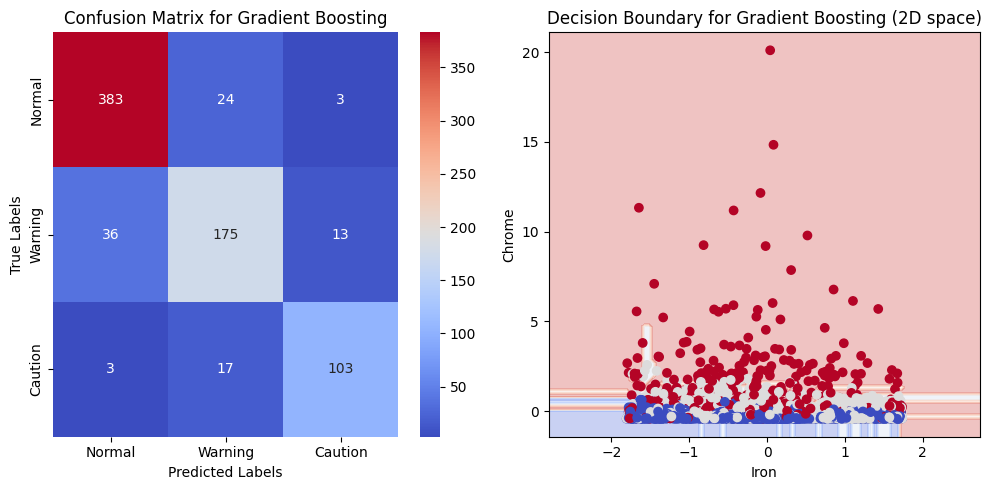

In [50]:
hw4.GradientBoosting(features,labels,labels_names,1)

Fig. 5: (a) Confusion matrix for Gradient Boosting. (b) Decision boundary visualization with 2 features (blue - normal, white - warning, red - caution)

### Conclusions and Discussion

We observe that amongst all models, Random Forest performs best with a test case accuracy score of 88.38 % followed by Gradient Boosting with 87.32 % accuracy. This might because of the ensemble nature of the Random forest. It averages predictions from multiple trees, reducing variance and overfitting and thereby can tackle nonlinear data better. It aggregates predictions from multiple trees, diluting the impact of outliers and are more resistant to noise.

## Task 2

The Oil analysis dataset is now classified based on the 'Diagnostics' label. For each ML model, the raw dataset is first cleaned and preprocessed per the requirmenets using the hw2.py preprocess_oil() function and then splitted into 80/20 % for training and test cases. Standard scaling is also performed for all models.

In [27]:
hw4.percent_diagnostics(df)

Normal state proportion: 49.23%
comp_wear state proportion: 27.12%
silica_ISO state proportion: 10.00%
oil_cont state proportion: 5.37%
water_cont state proportion: 4.24%
silica_water state proportion: 4.04%


1.) Logistic Regression (penalty = 'l2', C = 1000, random_state = 42, max_iter = 1000)

Accuracy on train dataset: 81.60%
                     precision    recall  f1-score   support

             Normal    0.85327   0.92421   0.88732       409
     Component Wear    0.83333   0.93264   0.88020       193
    Silica ISO 4406    0.62295   0.55882   0.58915        68
  Oil Contamination    0.18182   0.05000   0.07843        40
Water Contamination    1.00000   0.66667   0.80000        24
    Silica and Wear    0.80000   0.34783   0.48485        23

           accuracy                        0.82166       757
          macro avg    0.71523   0.58003   0.61999       757
       weighted avg    0.79505   0.82166   0.80098       757

Balanced Accurancy: 0.58003
Unbalanced Accurancy: 0.82166


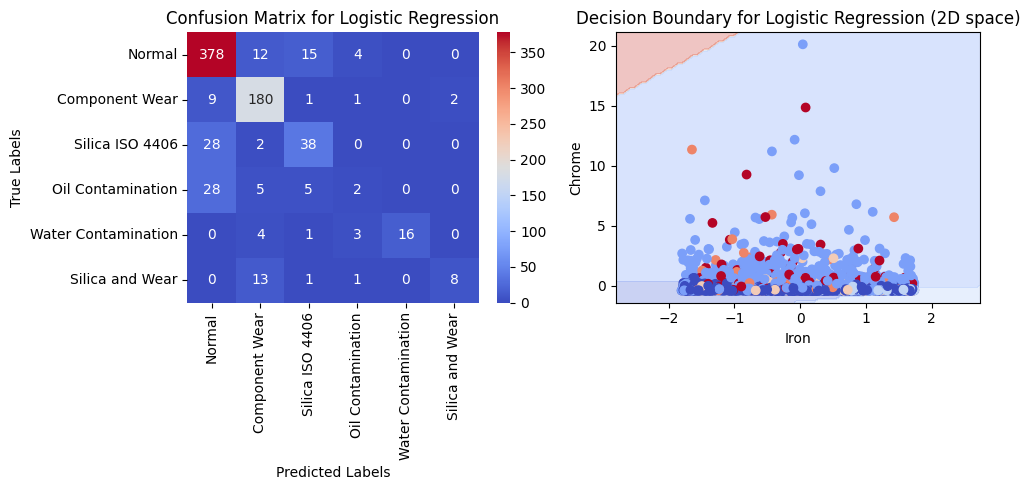

In [20]:
import hw4
labels_names = ['Normal', 'Component Wear', 'Silica ISO 4406', 'Oil Contamination', 'Water Contamination', 'Silica and Wear']
hw4.Logistic(features,labels,labels_names,2)

Fig. 6: (a) Confusion matrix for Logistic regression. (b) Decision boundary visualization with 2 features (dark blue - Normal, medium blue - Comp_wear, light blue - Silica ISO, light red - Oil contamination, medium red - water contamination, dark red - Silica and water)

2. Support Vector Machines (kernel = 'rbf', C = 100, gamma = 'scale')

Accuracy on train dataset: 94.35%
                     precision    recall  f1-score   support

             Normal    0.89696   0.93643   0.91627       409
     Component Wear    0.83871   0.94301   0.88780       193
    Silica ISO 4406    0.73529   0.73529   0.73529        68
  Oil Contamination    0.16667   0.05000   0.07692        40
Water Contamination    1.00000   0.58333   0.73684        24
    Silica and Wear    0.63158   0.52174   0.57143        23

           accuracy                        0.84941       757
          macro avg    0.71153   0.62830   0.65409       757
       weighted avg    0.82420   0.84941   0.83224       757

Balanced Accurancy: 0.62830
Unbalanced Accurancy: 0.84941


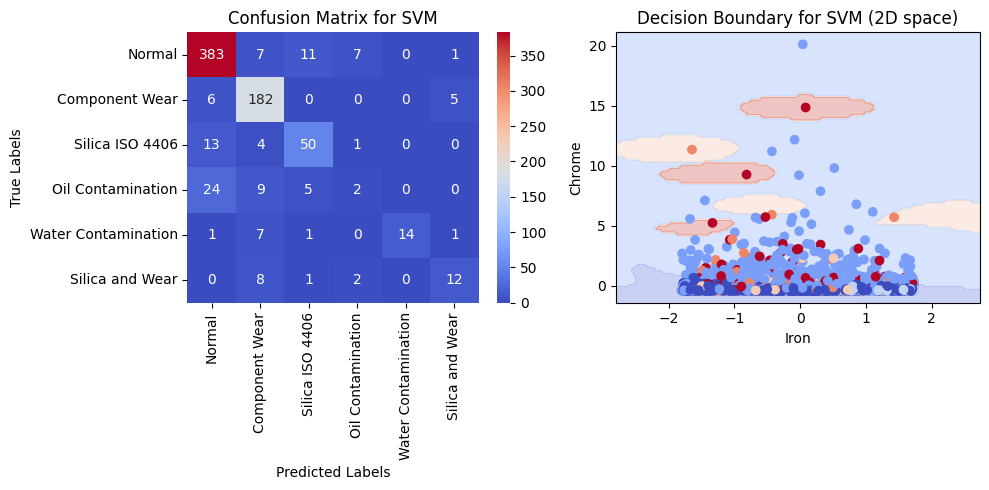

In [21]:
hw4.SVM(features,labels,labels_names,2)

Fig. 7: (a) Confusion matrix for SVM. (b) Decision boundary visualization with 2 features (dark blue - Normal, medium blue - Comp_wear, light blue - Silica ISO, light red - Oil contamination, medium red - water contamination, dark red - Silica and water)

3.) Decision Tree (criterion = 'gini', max_depth = 20, min_samples_split = 20, min_samples_leaf = 5, min_impurity_decrease = 0, random_state = 42)

Accuracy on train dataset: 90.39%
                     precision    recall  f1-score   support

             Normal    0.89767   0.94377   0.92014       409
     Component Wear    0.86735   0.88083   0.87404       193
    Silica ISO 4406    0.83824   0.83824   0.83824        68
  Oil Contamination    0.42857   0.15000   0.22222        40
Water Contamination    1.00000   0.87500   0.93333        24
    Silica and Wear    0.71429   0.86957   0.78431        23

           accuracy                        0.87186       757
          macro avg    0.79102   0.75957   0.76205       757
       weighted avg    0.85749   0.87186   0.86044       757

Balanced Accurancy: 0.75957
Unbalanced Accurancy: 0.87186


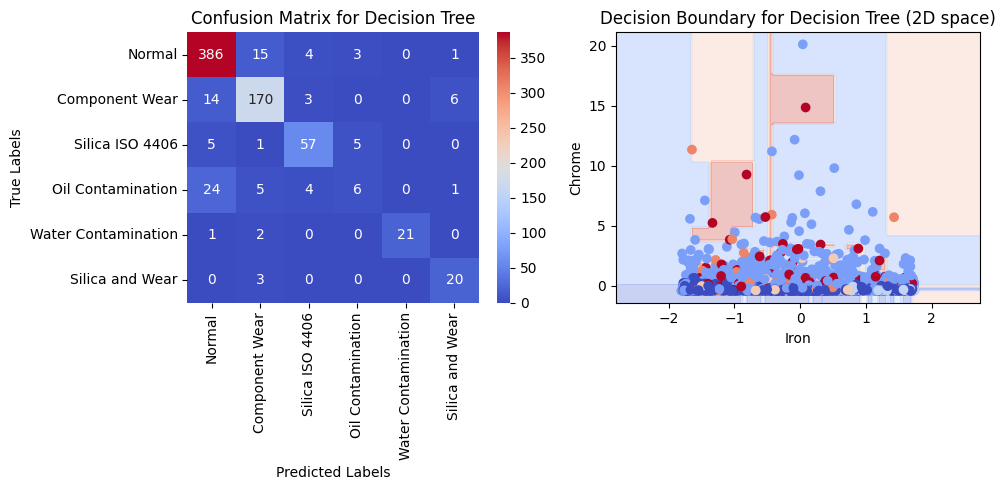

In [22]:
hw4.DecisionTree(features,labels,labels_names,2)

Fig. 8: (a) Confusion matrix for Decision Tree. (b) Decision boundary visualization with 2 features (dark blue - Normal, medium blue - Comp_wear, light blue - Silica ISO, light red - Oil contamination, medium red - water contamination, dark red - Silica and water)

4.) Random Forest = (criterion = 'gini', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, min_impurity_decrease = 0, random_state = 42, 
n_estimators = 100, bootstrap = True, oob_score = False)

Accuracy on train dataset: 100.00%
                     precision    recall  f1-score   support

             Normal    0.90023   0.97066   0.93412       409
     Component Wear    0.88995   0.96373   0.92537       193
    Silica ISO 4406    0.87692   0.83824   0.85714        68
  Oil Contamination    0.50000   0.05000   0.09091        40
Water Contamination    1.00000   0.87500   0.93333        24
    Silica and Wear    0.94118   0.69565   0.80000        23

           accuracy                        0.89696       757
          macro avg    0.85138   0.73221   0.75681       757
       weighted avg    0.87877   0.89696   0.87632       757

Balanced Accurancy: 0.73221
Unbalanced Accurancy: 0.89696


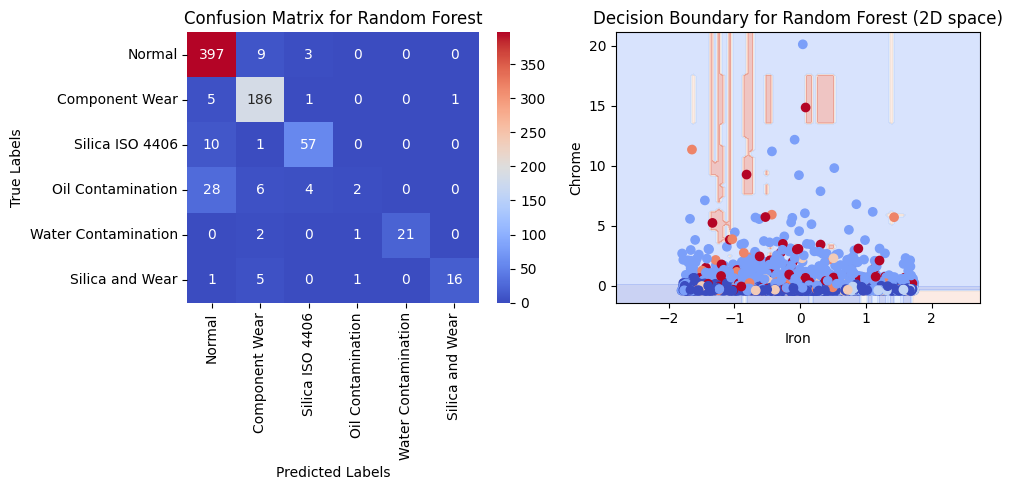

In [24]:
hw4.RandomForest(features,labels,labels_names,2)

Fig. 9: (a) Confusion matrix for Random Forest. (b) Decision boundary visualization with 2 features (dark blue - Normal, medium blue - Comp_wear, light blue - Silica ISO, light red - Oil contamination, medium red - water contamination, dark red - Silica and water)

5. Gradient Boosting (max_depth = 20, n_estimators = 50, learning_rate = 0.5, random_state = 42)

Accuracy on train dataset: 100.00%
                     precision    recall  f1-score   support

             Normal    0.89120   0.94132   0.91558       409
     Component Wear    0.88265   0.89637   0.88946       193
    Silica ISO 4406    0.83582   0.82353   0.82963        68
  Oil Contamination    0.33333   0.15000   0.20690        40
Water Contamination    1.00000   0.91667   0.95652        24
    Silica and Wear    0.72727   0.69565   0.71111        23

           accuracy                        0.86922       757
          macro avg    0.77838   0.73726   0.75153       757
       weighted avg    0.85304   0.86922   0.85884       757

Balanced Accurancy: 0.73726
Unbalanced Accurancy: 0.86922


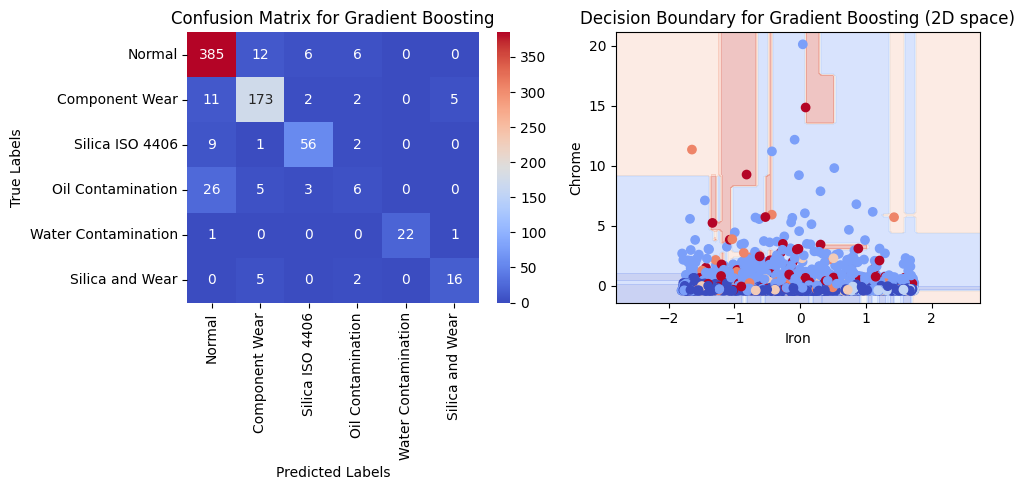

In [25]:
hw4.GradientBoosting(features,labels,labels_names,2)

Fig. 10: (a) Confusion matrix for Gradient Boosting. (b) Decision boundary visualization with 2 features (dark blue - Normal, medium blue - Comp_wear, light blue - Silica ISO, light red - Oil contamination, medium red - water contamination, dark red - Silica and water)

### Conclusions and Discussion

We observe that amongst all models, Random Forest performs best with a test case accuracy score of 89.7 % followed by Decision Tree with 87.2 % accuracy. This might because of the ensemble nature of the Random forest. It averages predictions from multiple trees, reducing variance and overfitting and thereby can tackle nonlinear data better. It aggregates predictions from multiple trees, diluting the impact of outliers and are more resistant to noise.